# Lazypredict, PyCaret, FLAML
무슨 모델이 성능이 좋은지 쉽게 확인할 수 있는 라이브러리들 확인하기

## 1. Lazypredict

### lazypredict 라이브러리 설치

In [1]:
!pip install lazypredict

### 데이터셋 로드

In [10]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "Spending Score (1-100)"]
y = df["Spending Score (1-100)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### LazyPredict 라이브러리

- y가 수치형인 경우 LazyRegressor를 import, 범주형일 경우 LazyClassifier를 import
- predictions = True 해줘야만 각 모델의 정확도를 얻고 모든 모델의 예측을 할 수 있다.

In [16]:
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

In [20]:
models = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)
models, predictions = models.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  5%|▍         | 2/42 [00:00<00:02, 18.72it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` wa

In [23]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.23,0.28,22.37,0.07
ExtraTreesRegressor,0.22,0.27,22.56,0.11
KNeighborsRegressor,0.21,0.26,22.73,0.02
GradientBoostingRegressor,0.05,0.12,24.88,0.10
OrthogonalMatchingPursuitCV,0.02,0.09,25.27,0.02
OrthogonalMatchingPursuit,0.02,0.09,25.27,0.02
HistGradientBoostingRegressor,0.02,0.09,25.28,0.09
LassoLarsIC,0.02,0.09,25.29,0.02
LarsCV,0.02,0.09,25.30,0.06


### 각 모델의 예측값

In [21]:
predictions

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GammaRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,45.07,46.20,45.35,43.00,50.16,46.16,46.48,43.00,45.50,46.83,...,40.12,47.13,43.85,44.65,44.33,47.79,43.60,47.36,47.40,48.72
1,64.59,70.30,57.50,75.00,50.16,55.35,54.92,40.00,56.67,54.75,...,30.12,74.24,57.37,58.02,58.59,54.14,56.90,54.89,71.55,53.36
2,62.37,41.30,55.19,73.00,50.16,53.60,53.31,78.00,65.00,53.00,...,37.12,45.04,55.36,55.60,55.97,52.55,55.13,53.36,52.40,54.33
3,46.00,39.50,40.00,36.00,50.16,42.84,43.43,5.00,32.08,43.93,...,32.75,53.68,37.42,38.61,37.79,47.57,37.12,44.24,36.56,46.40
4,46.00,50.30,33.36,56.00,50.16,37.89,38.90,56.00,50.33,40.07,...,51.12,51.11,30.45,31.44,30.22,47.54,30.40,39.91,52.40,51.65
5,63.42,46.40,56.61,41.00,50.16,54.71,54.34,51.00,45.45,53.61,...,49.50,46.33,57.97,57.42,57.91,52.14,58.06,54.00,43.94,42.54
6,53.67,65.30,58.81,66.00,50.16,57.27,56.72,55.00,74.02,54.52,...,67.75,66.90,61.31,60.10,60.79,56.37,61.63,55.01,65.03,74.16
7,46.00,45.30,39.16,56.00,50.16,42.24,42.89,60.00,51.23,43.07,...,50.75,50.50,37.91,38.03,37.14,46.55,38.13,43.41,55.84,51.65
8,45.07,49.80,42.33,56.00,50.16,43.89,44.40,44.00,48.61,44.85,...,50.88,49.83,41.22,41.50,40.95,46.88,41.27,45.34,51.21,50.43
9,60.42,57.90,51.40,58.00,50.16,50.75,50.70,72.00,50.10,50.48,...,40.62,58.28,50.96,51.40,51.53,50.29,50.72,51.02,65.48,59.74


## 2. PyCaret

1) 지도학습
- 분류
- 회귀

2) 비지도학습
- 클러스터링
- 이상탐지
- 자연어처리
- 연관규칙마이닝

3) 시계열

4) 데이터셋

### PyCaret 라이브러리 설치

In [1]:
!pip install pycaret
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Using cached MarkupSafe-2.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Breast Cancer Wisconsin Dataset.csv')
train.shape #데이터크기

(569, 33)

In [43]:
train.info() #데이터구조

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 예측값 비율

-------------전체 발병율---------------
B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

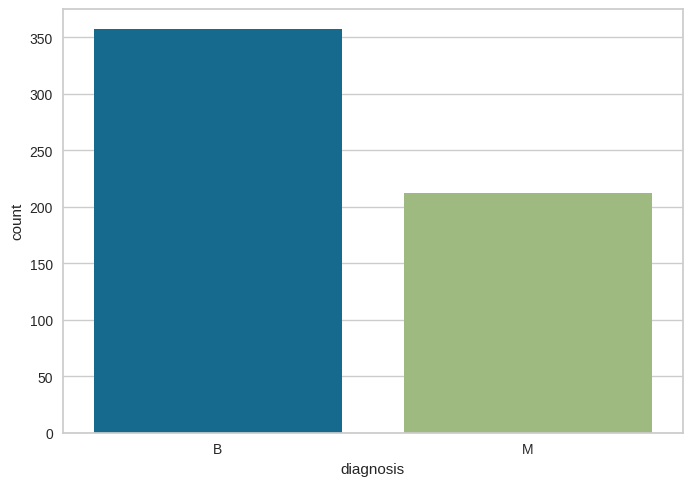

In [45]:
print("-------------전체 발병율---------------")
print(train['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=train, order=train['diagnosis'].value_counts().index)

### 변수별 상관관계

-----------변수별 상관관계-------------


<ipython-input-46-512130d90bbf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train[train.columns.drop('id')].corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')


<Axes: >

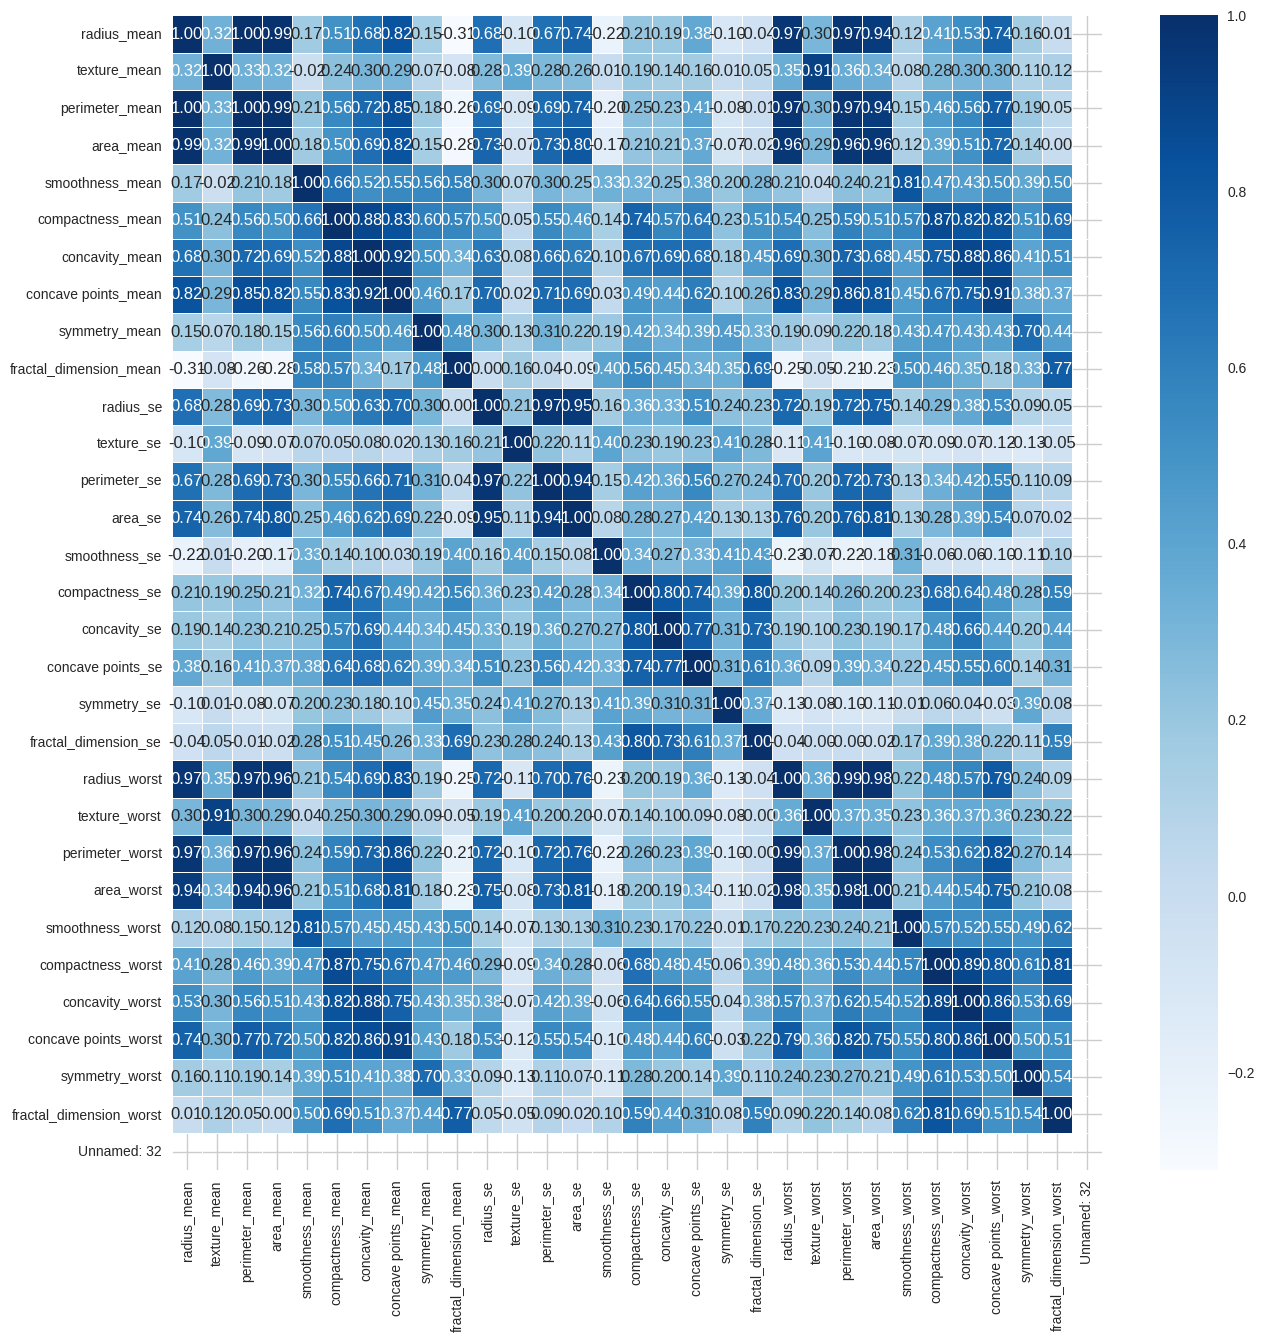

In [46]:
print("-----------변수별 상관관계-------------")
plt.figure(figsize=(15,15))
sns.heatmap(data = train[train.columns.drop('id')].corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')

### 불필요한 컬럼 삭제

In [47]:
train = train.drop('id', axis=1)

### 훈련셋, 테스트셋 분리

In [48]:
test = train.iloc[-50:]
train = train.iloc[:-50]

### pycaret 활용

In [49]:
from pycaret.classification import *
setup_clf = setup(data=train, target='diagnosis', train_size=0.7, normalize=True, normalize_method='minmax', session_id=777)

,Description,Value
0,Session id,777
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(519, 32)"
5,Transformed data shape,"(519, 31)"
6,Transformed train set shape,"(363, 31)"
7,Transformed test set shape,"(156, 31)"
8,Numeric features,31
9,Rows with missing values,100.0%


### 모델 비교

In [50]:
model = compare_models(sort='Accuracy', fold=5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9670,0.9841,0.9362,0.9783,0.9565,0.9299,0.9308,0.0940
svm,SVM - Linear Kernel,0.9669,0.0000,0.9362,0.9786,0.9560,0.9296,0.9312,0.0740
et,Extra Trees Classifier,0.9669,0.9944,0.9433,0.9714,0.9570,0.9301,0.9306,0.4140
xgboost,Extreme Gradient Boosting,0.9615,0.9909,0.9433,0.9581,0.9501,0.9187,0.9195,0.1480
lightgbm,Light Gradient Boosting Machine,0.9615,0.9922,0.9433,0.9581,0.9501,0.9187,0.9195,0.1780
lr,Logistic Regression,0.9614,0.9955,0.9079,0.9926,0.9480,0.9174,0.9201,0.0960
ridge,Ridge Classifier,0.9586,0.0000,0.8936,1.0000,0.9434,0.9110,0.9151,0.0720
ada,Ada Boost Classifier,0.9586,0.9920,0.9502,0.9464,0.9473,0.9132,0.9146,0.4320
gbc,Gradient Boosting Classifier,0.9586,0.9914,0.9431,0.9513,0.9467,0.9129,0.9135,0.7940
qda,Quadratic Discriminant Analysis,0.9533,0.9841,0.9505,0.9318,0.9409,0.9023,0.9026,0.0900


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## FLAML

### 데이터셋 준비

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [52]:
cancer = load_breast_cancer()

In [53]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### FLAML 설치

In [55]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 6.8 MB/s eta 0:00:00


### FLAML로 학습하기

In [56]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

### FLAML에서 AutaML 클래스를 불러와 학습

In [58]:
from flaml import AutoML

automl = AutoML()
automl.fit(X_train = X_train, y_train = y_train, task = 'classification', time_budget = 60)

[flaml.automl.logger: 07-17 07:14:29] {1693} INFO - task = classification
[flaml.automl.logger: 07-17 07:14:29] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 07-17 07:14:29] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-17 07:14:29] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 07-17 07:14:29] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 07-17 07:14:29] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 07-17 07:14:31] {2347} INFO - Estimated sufficient time budget=17627s. Estimated necessary time budget=406s.
[flaml.automl.logger: 07-17 07:14:31] {2394} INFO -  at 1.8s,	estimator lgbm's best error=0.0200,	best estimator lgbm's best error=0.0200
[flaml.automl.logger: 07-17 07:14:31] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-17 07:14:31] {2394} INFO -  at 2.3s,	estimator lgbm's best error

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 11.8s,	estimator xgboost's best error=0.0149,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 11.9s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 58, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 12.0s,	estimator xgboost's best error=0.0123,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 59, current learner xgboost
[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 12.1s,	estimator xgboost's best error=0.0123,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 12.2s,	estimator xgboost's best error=0.0123,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 61, current learner xgboost
[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 12.2s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 12.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 63, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:41] {2394} INFO -  at 12.4s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:41] {2221} INFO - iteration 64, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.4s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 65, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.5s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 66, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.7s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 67, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.7s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.8s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.9s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 12.9s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 13.0s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 72, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 13.1s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 13.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 13.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 75, current learner xgboost
[flaml.automl.logger: 07-17 07:14:42] {2394} INFO -  at 13.4s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:42] {2221} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 07-17 07:14:43] {2394} INFO -  at 13.5s,	estimator lgbm's best er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:43] {2394} INFO -  at 13.7s,	estimator extra_tree's best error=0.0284,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:43] {2221} INFO - iteration 78, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:43] {2394} INFO -  at 13.8s,	estimator extra_tree's best error=0.0222,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:43] {2221} INFO - iteration 79, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:43] {2394} INFO -  at 14.0s,	estimator extra_tree's best error=0.0222,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:43] {2221} INFO - iteration 80, current learner xgboost
[flaml.automl.logger: 07-17 07:14:43] {2394} INFO -  at 14.1s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:43] {2221} INFO - iteration 81, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:43] {2394} INFO -  at 14.3s,	estimator extra_tree's best error=0.0139,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:43] {2221} INFO - iteration 82, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:44] {2394} INFO -  at 14.5s,	estimator extra_tree's best error=0.0139,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:44] {2221} INFO - iteration 83, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:44] {2394} INFO -  at 14.8s,	estimator extra_tree's best error=0.0138,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:44] {2221} INFO - iteration 84, current learner xgboost
[flaml.automl.logger: 07-17 07:14:44] {2394} INFO -  at 14.9s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:44] {2221} INFO - iteration 85, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:46] {2394} INFO -  at 16.9s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:46] {2221} INFO - iteration 86, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:46] {2394} INFO -  at 17.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:46] {2221} INFO - iteration 87, current learner rf
[flaml.automl.logger: 07-17 07:14:46] {2394} INFO -  at 17.2s,	estimator rf's best error=0.0190,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:46] {2221} INFO - iteration 88, current learner rf
[flaml.automl.logger: 07-17 07:14:47] {2394} INFO -  at 17.4s,	estimator rf's best error=0.0190,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:47] {2221} INFO - iteration 89, current learner rf
[flaml.automl.logger: 07-17 07:14:47] {2394} INFO -  at 17.6s,	estimator rf's best error=0.0190,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:47] {2221} INFO - iteration 90, current learner rf
[flaml.automl.logger: 07-17 07:14:47] {2394} INFO -  at 17.8s,	estimator rf's best error=0.0190,	best estimato

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:48] {2394} INFO -  at 18.5s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:48] {2221} INFO - iteration 92, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:48] {2394} INFO -  at 18.7s,	estimator rf's best error=0.0190,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:48] {2221} INFO - iteration 93, current learner rf
[flaml.automl.logger: 07-17 07:14:48] {2394} INFO -  at 18.9s,	estimator rf's best error=0.0129,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:48] {2221} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 07-17 07:14:48] {2394} INFO -  at 19.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:48] {2221} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 07-17 07:14:48] {2394} INFO -  at 19.1s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:48] {2221} INFO - iteration 96, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:48] {2394} INFO -  at 19.3s,	estimator rf's best error=0.0129,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:48] {2221} INFO - iteration 97, current learner rf
[flaml.automl.logger: 07-17 07:14:49] {2394} INFO -  at 19.6s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:49] {2221} INFO - iteration 98, current learner rf
[flaml.automl.logger: 07-17 07:14:49] {2394} INFO -  at 19.8s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:49] {2221} INFO - iteration 99, current learner rf
[flaml.automl.logger: 07-17 07:14:49] {2394} INFO -  at 20.1s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:49] {2221} INFO - iteration 100, current learner xgboost
[flaml.automl.logger: 07-17 07:14:49] {2394} INFO -  at 20.2s,	estimator xgboost's best error=0.0059,	best

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:50] {2394} INFO -  at 20.5s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:50] {2221} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 07-17 07:14:50] {2394} INFO -  at 20.6s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:50] {2221} INFO - iteration 103, current learner rf
[flaml.automl.logger: 07-17 07:14:50] {2394} INFO -  at 20.9s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:50] {2221} INFO - iteration 104, current learner rf
[flaml.automl.logger: 07-17 07:14:50] {2394} INFO -  at 21.2s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:50] {2221} INFO - iteration 105, current learner rf
[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 21.5s,	estimator rf's best error=0.0088,	best es

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 22.0s,	estimator rf's best error=0.0083,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:51] {2221} INFO - iteration 108, current learner xgboost
[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 22.1s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:51] {2221} INFO - iteration 109, current learner xgboost
[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 22.2s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:51] {2221} INFO - iteration 110, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 22.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:51] {2221} INFO - iteration 111, current learner xgboost
[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 22.3s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:51] {2221} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 07-17 07:14:51] {2394} INFO -  at 22.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:51] {2221} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:52] {2394} INFO -  at 22.6s,	estimator extra_tree's best error=0.0130,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:52] {2221} INFO - iteration 114, current learner lgbm
[flaml.automl.logger: 07-17 07:14:52] {2394} INFO -  at 22.6s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:52] {2221} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 07-17 07:14:52] {2394} INFO -  at 22.7s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:52] {2221} INFO - iteration 116, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:52] {2394} INFO -  at 23.0s,	estimator extra_tree's best error=0.0119,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:52] {2221} INFO - iteration 117, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:52] {2394} INFO -  at 23.2s,	estim

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 23.8s,	estimator extra_tree's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 122, current learner xgboost
[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 23.9s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 123, current learner lgbm
[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 24.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 124, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 24.1s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 24.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 24.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 07-17 07:14:53] {2394} INFO -  at 24.4s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:53] {2221} INFO - iteration 128, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:54] {2394} INFO -  at 24.6s,	estimator extra_tree's 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:54] {2394} INFO -  at 25.0s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:54] {2221} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 07-17 07:14:54] {2394} INFO -  at 25.1s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:54] {2221} INFO - iteration 133, current learner xgboost
[flaml.automl.logger: 07-17 07:14:54] {2394} INFO -  at 25.1s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:54] {2221} INFO - iteration 134, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:54] {2394} INFO -  at 25.3s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:54] {2221} INFO - iteration 135, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:55] {2394} INFO -  at 25.6s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:55] {2221} INFO - iteration 136, current learner xgboost
[flaml.automl.logger: 07-17 07:14:55] {2394} INFO -  at 25.7s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:55] {2221} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 07-17 07:14:55] {2394} INFO -  at 25.8s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:55] {2221} INFO - iteration 138, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:55] {2394} INFO -  at 26.0s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:55] {2221} INFO - iteration 139, current learner lgbm
[flaml.automl.logger: 07-17 07:14:55] {2394} INFO -  at 26.1s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:55] {2221} INFO - iteration 140, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:55] {2394} INFO -  at 26.4s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:55] {2221} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 26.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 142, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 26.6s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 143, current learner xgboost
[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 26.7s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 144, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 26.8s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 27.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 27.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 27.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:56] {2221} INFO - iteration 148, current learner lgbm
[flaml.automl.logger: 07-17 07:14:56] {2394} INFO -  at 27.3s,	estimator lgbm's best erro

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:57] {2394} INFO -  at 27.8s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:57] {2221} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 07-17 07:14:57] {2394} INFO -  at 28.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:14:57] {2221} INFO - iteration 155, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:57] {2394} INFO -  at 28.3s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:57] {2221} INFO - iteration 156, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:58] {2394} INFO -  at 28.6s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:58] {2221} INFO - iteration 157, current learner xgboost
[flaml.automl.logger: 07-17 07:14:58] {2394} INFO -  

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:14:58] {2394} INFO -  at 28.8s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:58] {2221} INFO - iteration 159, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:58] {2394} INFO -  at 29.2s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:58] {2221} INFO - iteration 160, current learner xgboost
[flaml.automl.logger: 07-17 07:14:59] {2394} INFO -  at 29.4s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:59] {2221} INFO - iteration 161, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:14:59] {2394} INFO -  at 29.8s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:59] {2221} INFO - iteration 162, current learner extra_tree
[flaml.automl.logger: 07-17 07:14:59] {2394} INFO -  at 30.1s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:14:59] {2221} INFO - iteration 163, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:00] {2394} INFO -  at 30.6s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:00] {2221} INFO - iteration 164, current learner xgboost
[flaml.automl.logger: 07-17 07:15:00] {2394} INFO -  at 30.7s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:00] {2221} INFO - iteration 165, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:00] {2394} INFO -  at 31.1s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:00] {2221} INFO - iteration 166, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:01] {2394} INFO -  at 31.5s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:01] {2221} INFO - iteration 167, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:01] {2394} INFO -  at 31.8s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:01] {2221} INFO - iteration 168, current learner lgbm
[flaml.automl.logger: 07-17 07:15:01] {2394} INFO -  at 31.9s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:01] {2221} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 07-17 07:15:01] 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:02] {2394} INFO -  at 32.9s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:02] {2221} INFO - iteration 173, current learner xgboost
[flaml.automl.logger: 07-17 07:15:02] {2394} INFO -  at 33.1s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:02] {2221} INFO - iteration 174, current learner xgboost
[flaml.automl.logger: 07-17 07:15:02] {2394} INFO -  at 33.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:02] {2221} INFO - iteration 175, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:03] {2394} INFO -  at 33.5s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:03] {2221} INFO - iteration 176, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:03] {2394} INFO -  at 33.9s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:03] {2221} INFO - iteration 177, current learner xgboost
[flaml.automl.logger: 07-17 07:15:03] {2394} INFO -  at 34.0s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:03] {2221} INFO - iteration 178, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:03] {2394} INFO -  at 34.1s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:03] {2221} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:03] {2394} INFO -  at 34.3s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:03] {2221} INFO - iteration 180, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:04] {2394} INFO -  at 34.6s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:04] {2221} INFO - iteration 181, current learner rf
[flaml.automl.logger: 07-17 07:15:04] {2394} INFO -  at 35.0s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:04] {2221} INFO - iteration 182, current learner rf
[flaml.automl.logger: 07-17 07:15:05] {2394} INFO -  at 35.5s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:05] {2221} INFO - iteration 183, current learner rf
[flaml.automl.logger: 07-17 07:15:05] {2394} INFO -  at 35.8

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:06] {2394} INFO -  at 37.4s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:06] {2221} INFO - iteration 189, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:07] {2394} INFO -  at 37.7s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:07] {2221} INFO - iteration 190, current learner rf
[flaml.automl.logger: 07-17 07:15:07] {2394} INFO -  at 38.2s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:07] {2221} INFO - iteration 191, current learner xgboost
[flaml.automl.logger: 07-17 07:15:07] {2394} INFO -  at 38.3s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:07] {2221} INFO - iteration 192, current learner xgboost
[flaml.automl.logger: 07-17 07:15:07] {2394} INFO -  

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:08] {2394} INFO -  at 38.6s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:08] {2221} INFO - iteration 194, current learner rf
[flaml.automl.logger: 07-17 07:15:08] {2394} INFO -  at 39.0s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:08] {2221} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 07-17 07:15:08] {2394} INFO -  at 39.1s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:08] {2221} INFO - iteration 196, current learner xgboost
[flaml.automl.logger: 07-17 07:15:08] {2394} INFO -  at 39.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:08] {2221} INFO - iteration 197, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:08] {2394} INFO -  at 39.4s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:09] {2221} INFO - iteration 198, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:09] {2394} INFO -  at 39.7s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:09] {2221} INFO - iteration 199, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:09] {2394} INFO -  at 40.1s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:09] {2221} INFO - iteration 200, current learner lgbm
[flaml.automl.logger: 07-17 07:15:09] {2394} INFO -  at 40.2s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:09] {2221} INFO - iteration 201, current learner rf
[flaml.automl.logger: 07-17 07:15:10] {2

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:10] {2394} INFO -  at 41.1s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:15:10] {2221} INFO - iteration 204, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:10] {2394} INFO -  at 41.4s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:10] {2221} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 07-17 07:15:11] {2394} INFO -  at 41.5s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:11] {2221} INFO - iteration 206, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:11] {2394} INFO -  at 41.7s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:11] {2221} INFO - iteration 207, current learner xgboost
[flaml.automl.logger: 07-17 07:15:11] {2394} INFO -  at 41.8s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:11] {2221} INFO - iteration 208, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:11] {2394} INFO -  at 42.1s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:11] {2221} INFO - iteration 209, current learner rf
[flaml.automl.logger: 07-17 07:15:12] {2394} INFO -  at 42.6s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:12] {2221} INFO - iteration 210, current learner xgboost
[flaml.automl.logger: 07-17 07:15:12] {2394} INFO -  at 42.7s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:12] {2221} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 07-17 07:15:12] {2394} INFO -  at 42.7s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:12] {2221} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:12] {2394} INFO -  at 43.1s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:12] {2221} INFO - iteration 213, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:12] {2394} INFO -  at 43.3s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:12] {2221} INFO - iteration 214, current learner rf
[flaml.automl.logger: 07-17 07:15:13] {2394} INFO -  at 43.6s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:13] {2221} INFO - iteration 215, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:13] {2394} INFO -  at 43.9s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:13] {2221} INFO - iteration 216, current learner lgbm
[flaml.automl.logger: 07-17 07:15:14] {239

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:15] {2394} INFO -  at 45.5s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:15] {2221} INFO - iteration 221, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:15] {2394} INFO -  at 45.8s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:15] {2221} INFO - iteration 222, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:15] {2394} INFO -  at 46.2s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:15] {2221} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 07-17 07:15:16] {2394} INFO -  at 47.0s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:16] {2221} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 07-17 07:15:16] {2394}

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:19] {2394} INFO -  at 49.8s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:19] {2221} INFO - iteration 232, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:19] {2394} INFO -  at 50.0s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:19] {2221} INFO - iteration 233, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:19] {2394} INFO -  at 50.2s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:19] {2221} INFO - iteration 234, current learner xgboost
[flaml.automl.logger: 07-17 07:15:19] {2394} INFO -  at 50.3s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:19] {2221} INFO - iteration 235, current learner xgboost
[flaml.automl.logger: 07-17 0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:20] {2394} INFO -  at 50.7s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:20] {2221} INFO - iteration 237, current learner rf
[flaml.automl.logger: 07-17 07:15:20] {2394} INFO -  at 51.1s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:20] {2221} INFO - iteration 238, current learner xgboost
[flaml.automl.logger: 07-17 07:15:20] {2394} INFO -  at 51.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:20] {2221} INFO - iteration 239, current learner xgboost
[flaml.automl.logger: 07-17 07:15:20] {2394} INFO -  at 51.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:20] {2221} INFO - iteration 240, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:20] {2394} INFO -  at 51.4s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:20] {2221} INFO - iteration 241, current learner xgboost
[flaml.automl.logger: 07-17 07:15:21] {2394} INFO -  at 51.5s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:21] {2221} INFO - iteration 242, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:21] {2394} INFO -  at 51.6s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:21] {2221} INFO - iteration 243, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:21] {2394} INFO -  at 51.9s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:21] {2221} INFO - iteration 244, current learner rf
[flaml.automl.logger: 07-17 07:15:22] {2394} INFO -  at 52.8s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:22] {2221} INFO - iteration 245, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:22] {2394} INFO -  at 53.2s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:22] {2221} INFO - iteration 246, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:23] {2394} INFO -  at 53.5s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:23] {2221} INFO - iteration 247, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:23] {2394} INFO -  at 53.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:23] {2221} INFO - iteration 248, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:23] {2394} INFO -  at 54.1s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:23] {2221} INFO - iteration 249, current learner xgboost
[flaml.automl.logger: 07-17 07:15:23] {2394} INFO -  at 54.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:23] {2221} INFO - iteration 250, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:24] {2394} INFO -  at 54.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:24] {2221} INFO - iteration 251, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:24] {2394} INFO -  at 55.0s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:24] {2221} INFO - iteration 252, current learner xgboost
[flaml.automl.logger: 07-17 07:15:24] {2394} INFO -  at 55.1s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:15:24] {2221} INFO - iteration 253, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:15:25] {2394} INFO -  at 55.6s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:25] {2221} INFO - iteration 254, current learner lgbm
[flaml.automl.logger: 07-17 07:15:25] {2394} INFO -  at 55.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:25] {2221} INFO - iteration 255, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:25] {2394} INFO -  at 56.1s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:25] {2221} INFO - iteration 256, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:26] {2394} INFO -  at 57.0s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:26] {2221} INFO - iteration 257, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:26] {2394} INFO -  at 57.2s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:26] {2221} INFO - iteration 258, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:27] {2394} INFO -  at 57.6s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:27] {2221} INFO - iteration 259, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:27] {2394} INFO -  at 57.9s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:27] {2221} INFO - iteration 260, current learner xgboost
[flaml.automl.logger: 07-1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:27] {2394} INFO -  at 58.3s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:27] {2221} INFO - iteration 262, current learner rf
[flaml.automl.logger: 07-17 07:15:28] {2394} INFO -  at 59.1s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:28] {2221} INFO - iteration 263, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:15:29] {2394} INFO -  at 59.4s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:29] {2221} INFO - iteration 264, current learner extra_tree
[flaml.automl.logger: 07-17 07:15:29] {2394} INFO -  at 59.7s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:29] {2221} INFO - iteration 265, current learner lgbm
[flaml.automl.logger: 07-17 07:15:29] {2394} INFO -  at 60.4s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:15:30] {2630} INFO - retrain extra_tree for 0.1s
[flaml.automl.logger: 07-17 07:15:30] {2633} INFO - retrained model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None,
                     max_features=0.16513592512765218, max_leaf_nodes=12,
                     max

### 학습 결과 확인

In [60]:
print("Best ML model :", automl.model)
print("Best hyperparameter config :", automl.best_config)
print("Best accuracy on validation data : {0:.4g}".format(1-automl.best_loss))
print("Training duration of best run : {0:.4g} s".format(automl.best_config_train_time))

Best ML model : <flaml.automl.model.ExtraTreesEstimator object at 0x7c7274385b70>
Best hyperparameter config : {'n_estimators': 21, 'max_features': 0.16513592512765218, 'max_leaves': 12, 'criterion': 'gini'}
Best accuracy on validation data : 0.9954
Training duration of best run : 0.1452 s


In [61]:
automl.model.estimator

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None,
                     max_features=0.16513592512765218, max_leaf_nodes=12,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=-1,
                     oob_score=False, random_state=12032022, verbose=0,
                     warm_start=False)

### time_budget = 120 으로 변경

In [63]:
automl.fit(X_train = X_train, y_train = y_train, task = 'classification', time_budget = 120)

[flaml.automl.logger: 07-17 07:23:14] {1693} INFO - task = classification
[flaml.automl.logger: 07-17 07:23:14] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 07-17 07:23:14] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-17 07:23:14] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 07-17 07:23:14] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 07-17 07:23:14] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 07-17 07:23:15] {2347} INFO - Estimated sufficient time budget=2551s. Estimated necessary time budget=59s.
[flaml.automl.logger: 07-17 07:23:15] {2394} INFO -  at 0.3s,	estimator lgbm's best error=0.0200,	best estimator lgbm's best error=0.0200
[flaml.automl.logger: 07-17 07:23:15] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-17 07:23:16] {2394} INFO -  at 1.6s,	estimator lgbm's best error=0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:17] {2394} INFO -  at 2.6s,	estimator xgboost's best error=0.0193,	best estimator xgboost's best error=0.0193
[flaml.automl.logger: 07-17 07:23:17] {2221} INFO - iteration 3, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:17] {2394} INFO -  at 2.8s,	estimator extra_tree's best error=0.0284,	best estimator xgboost's best error=0.0193
[flaml.automl.logger: 07-17 07:23:17] {2221} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:17] {2394} INFO -  at 3.0s,	estimator extra_tree's best error=0.0222,	best estimator xgboost's best error=0.0193
[flaml.automl.logger: 07-17 07:23:17] {2221} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 07-17 07:23:17] {2394} INFO -  at 3.1s,	estimator lgbm's best error=0.0147,	best estimator lgbm's best error=0.0147
[flaml.automl.logger: 07-17 07:23:17] {2221} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:18] {2394} INFO -  at 4.0s,	estimator xgboost's best error=0.0193,	best estimator lgbm's best error=0.0147
[flaml.automl.logger: 07-17 07:23:18] {2221} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 07-17 07:23:18] {2394} INFO -  at 4.1s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl.logger: 07-17 07:23:18] {2221} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 07-17 07:23:18] {2394} INFO -  at 4.1s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl.logger: 07-17 07:23:18] {2221} INFO - iteration 9, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:18] {2394} INFO -  at 4.2s,	estimator lgbm's best error=0.0114,	best estimator lgbm's best error=0.0114
[flaml.automl.logger: 07-17 07:23:18] {2221} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 07-17 07:23:18] {2394} INFO -  at 4.2s,	estimator lgbm's best error=0.0090,	best estimator lgbm's best error=0.0090
[flaml.automl.logger: 07-17 07:23:19] {2221} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 07-17 07:23:19] {2394} INFO -  at 4.3s,	estimator lgbm's best error=0.0090,	best estimator lgbm's best error=0.0090
[flaml.automl.logger: 07-17 07:23:19] {2221} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 07-17 07:23:19] {2394} INFO -  at 4.4s,	estimator lgbm's best error=0.0090,	best estimator lgbm's best error=0.0090
[flaml.automl.logger: 07-17 07:23:19] {2221} INFO - iteration 13, current learner lgbm
[flaml.automl.logger: 07-17 07:23:19] {2394} INFO -  at 4.4s,	estimator lgbm's best error=0.0090,	be

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:19] {2394} INFO -  at 5.2s,	estimator extra_tree's best error=0.0222,	best estimator lgbm's best error=0.0063
[flaml.automl.logger: 07-17 07:23:19] {2221} INFO - iteration 25, current learner lgbm
[flaml.automl.logger: 07-17 07:23:20] {2394} INFO -  at 5.3s,	estimator lgbm's best error=0.0063,	best estimator lgbm's best error=0.0063
[flaml.automl.logger: 07-17 07:23:20] {2221} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 07-17 07:23:20] {2394} INFO -  at 5.4s,	estimator lgbm's best error=0.0053,	best estimator lgbm's best error=0.0053
[flaml.automl.logger: 07-17 07:23:20] {2221} INFO - iteration 27, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:20] {2394} INFO -  at 5.6s,	estimator extra_tree's best error=0.0139,	best estimator lgbm's best error=0.0053
[flaml.automl.logger: 07-17 07:23:20] {2221} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:20] {2394} INFO -  at 5.7s,	estimator extr

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:20] {2394} INFO -  at 6.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:21] {2221} INFO - iteration 35, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:21] {2394} INFO -  at 6.5s,	estimator extra_tree's best error=0.0138,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:21] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-17 07:23:21] {2394} INFO -  at 6.6s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:21] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-17 07:23:21] {2394} INFO -  at 6.7s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:21] {2221} INFO - iteration 38, current learner rf
[flaml.automl.logger: 07-17 07:23:21] {2394} INFO -  at 6.9s,	estimator rf's best error=0.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:23] {2394} INFO -  at 8.9s,	estimator xgboost's best error=0.0123,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:23] {2221} INFO - iteration 45, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:23] {2394} INFO -  at 9.1s,	estimator rf's best error=0.0129,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:23] {2221} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 07-17 07:23:23] {2394} INFO -  at 9.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:23] {2221} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.3s,	estimator xgboost's best error=0.0123,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.4s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 49, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.5s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 50, current learner xgboost
[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.6s,	estimator xgboost's best error=0.0123,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 51, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.7s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.8s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-17 07:23:24] {2394} INFO -  at 9.9s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:24] {2221} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 07-17 07:23:25] {2394} INFO -  at 10.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:25] {2221} INFO - iteration 55, current learner rf
[flaml.automl.logger: 07-17 07:23:25] {2394} INFO -  at 10.6s,	estimator rf's best error=0.0129,	best

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:28] {2394} INFO -  at 13.8s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:28] {2221} INFO - iteration 64, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:28] {2394} INFO -  at 13.9s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:28] {2221} INFO - iteration 65, current learner rf
[flaml.automl.logger: 07-17 07:23:29] {2394} INFO -  at 14.5s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:29] {2221} INFO - iteration 66, current learner rf
[flaml.automl.logger: 07-17 07:23:29] {2394} INFO -  at 14.9s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:29] {2221} INFO - iteration 67, current learner lgbm
[flaml.automl.logger: 07-17 07:23:30] {2394} INFO -  at 15.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:30] {2221} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 07-17 07:23:31] {2394} INFO -  at 17.1s,	estimator lgbm's best error=0.0049,	best 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:32] {2394} INFO -  at 18.0s,	estimator rf's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:32] {2221} INFO - iteration 72, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:33] {2394} INFO -  at 18.6s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:33] {2221} INFO - iteration 73, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:33] {2394} INFO -  at 19.2s,	estimator rf's best error=0.0083,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:33] {2221} INFO - iteration 74, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 19.5s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 19.6s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 19.7s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 77, current learner xgboost
[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 19.8s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 19.9s,	estimator lgbm's best er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 20.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 80, current learner xgboost
[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 20.1s,	estimator xgboost's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 07-17 07:23:34] {2394} INFO -  at 20.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:34] {2221} INFO - iteration 82, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.3s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.4s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 84, current learner xgboost
[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.4s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 85, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.5s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 86, current learner xgboost
[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.6s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 87, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.8s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.8s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 89, current learner xgboost
[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 20.9s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 90, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 21.1s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 91, current learner xgboost
[flaml.automl.logger: 07-17 07:23:35] {2394} INFO -  at 21.2s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:35] {2221} INFO - iteration 92, current learner xgboost
[flaml.automl.logger: 07-17 07:23:36] {2394} INFO -  at 21.3s,	estimator xgboost's best error=0.0088,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:36] {2221} INFO - iteration 93, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:36] {2394} INFO -  at 21.7s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:36] {2221} INFO - iteration 94, current learner rf
[flaml.automl.logger: 07-17 07:23:36] {2394} INFO -  at 22.2s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:36] {2221} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 07-17 07:23:37] {2394} INFO -  at 22.2s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:37] {2221} INFO - iteration 96, current learner xgboost
[flaml.automl.logger: 07-17 07:23:37] {2394} INFO -  at 22.3s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:37] {2221} INFO - iteration 97, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:37] {2394} INFO -  at 22.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:37] {2221} INFO - iteration 98, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:37] {2394} INFO -  at 22.7s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:37] {2221} INFO - iteration 99, current learner rf
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.3s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 100, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 101, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.5s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 102, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.7s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 103, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.7s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.8s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.9s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 106, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 23.9s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 24.0s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 108, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 24.1s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 109, current learner xgboost
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 24.2s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 07-17 07:23:38] {2394} INFO -  at 24.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:38] {2221} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:39] {2394} INFO -  at 24.3s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:39] {2221} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 07-17 07:23:39] {2394} INFO -  at 24.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:39] {2221} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:39] {2394} INFO -  at 24.6s,	estimator extra_tree's best error=0.0130,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:39] {2221} INFO - iteration 114, current learner rf
[flaml.automl.logger: 07-17 07:23:39] {2394} INFO -  at 25.0s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:39] {2221} INFO - iteration 115, current learner rf
[flaml.automl.logger: 07-17 07:23:40] {2394} INFO -  at 25.4s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:40] {2221} INFO - iteration 116, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:40] {2394} INFO -  at 25.7s,	estimator extra_tree's best error=0.0119,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:40] {2221} INFO - iteration 117, current learner xgboost
[flaml.automl.logger: 07-17 07:23:40] {2394} INFO -  at 25.8s,	estimator xgboos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:40] {2394} INFO -  at 25.9s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:40] {2221} INFO - iteration 119, current learner xgboost
[flaml.automl.logger: 07-17 07:23:40] {2394} INFO -  at 26.0s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:40] {2221} INFO - iteration 120, current learner xgboost
[flaml.automl.logger: 07-17 07:23:40] {2394} INFO -  at 26.1s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:40] {2221} INFO - iteration 121, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:41] {2394} INFO -  at 26.3s,	estimator extra_tree's best error=0.0119,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:41] {2221} INFO - iteration 122, current learner xgboost
[flaml.automl.logger: 07-17 07:23:41] {2394} INFO -  at 26.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:41] {2221} INFO - iteration 123, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:41] {2394} INFO -  at 26.9s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:41] {2221} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 07-17 07:23:41] {2394} INFO -  at 27.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:41] {2221} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 07-17 07:23:41] {2394} INFO -  at 27.1s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:41] {2221} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 07-17 07:23:41] {2394} INFO -  at 27.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:41] {2221} INFO - iteration 127, current learner rf
[flaml.automl.logger: 07-17 07:23:42] {2394} INFO -  at 27.6s,	estimator rf's best error=0.0061,

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:42] {2394} INFO -  at 27.8s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:42] {2221} INFO - iteration 131, current learner xgboost
[flaml.automl.logger: 07-17 07:23:42] {2394} INFO -  at 27.9s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:42] {2221} INFO - iteration 132, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:43] {2394} INFO -  at 28.5s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:43] {2221} INFO - iteration 133, current learner rf
[flaml.automl.logger: 07-17 07:23:43] {2394} INFO -  at 28.8s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:43] {2221} INFO - iteration 134, current learner xgboost
[flaml.automl.logger: 07-17 07:23:43] {2394} INFO -  at 28.9s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:43] {2221} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:43] {2394} INFO -  at 29.1s,	estimator extra_tree's best error=0.0119,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:43] {2221} INFO - iteration 136, current learner xgboost
[flaml.automl.logger: 07-17 07:23:43] {2394} INFO -  at 29.2s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:43] {2221} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 07-17 07:23:44] {2394} INFO -  at 29.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:44] {2221} INFO - iteration 138, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:44] {2394} INFO -  at 29.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:44] {2221} INFO - iteration 139, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:44] {2394} INFO -  at 29.9s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:44] {2221} INFO - iteration 140, current learner xgboost
[flaml.automl.logger: 07-17 07:23:44] {2394} INFO -  at 30.1s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:44] {2221} INFO - iteration 141, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:45] {2394} INFO -  at 30.3s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:45] {2221} INFO - iteration 142, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:45] {2394} INFO -  at 30.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:45] {2221} INFO - iteration 143, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:45] {2394} INFO -  at 30.6s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:45] {2221} INFO - iteration 144, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:47] {2394} INFO -  at 32.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:47] {2221} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 07-17 07:23:48] {2394} INFO -  at 34.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:48] {2221} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 07-17 07:23:48] {2394} INFO -  at 34.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:48] {2221} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 07-17 07:23:48] {2394} INFO -  at 34.2s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:48] {2221} INFO - iteration 148, current learner lgbm
[flaml.automl.logger: 07-17 07:23:49] {2394} INFO -  at 34.3s,	estimator lgbm's best erro

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:49] {2394} INFO -  at 35.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:49] {2221} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 07-17 07:23:49] {2394} INFO -  at 35.1s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:49] {2221} INFO - iteration 155, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:50] {2394} INFO -  at 35.4s,	estimator extra_tree's best error=0.0102,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:50] {2221} INFO - iteration 156, current learner xgboost
[flaml.automl.logger: 07-17 07:23:50] {2394} INFO -  at 35.4s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:50] {2221} INFO - iteration 157, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:50] {2394} INFO -  at 35.9s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:50] {2221} INFO - iteration 158, current learner rf
[flaml.automl.logger: 07-17 07:23:51] {2394} INFO -  at 36.3s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:51] {2221} INFO - iteration 159, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:51] {2394} INFO -  at 36.4s,	estimator extra_tree's best error=0.0094,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:51] {2221} INFO - iteration 160, current learner rf
[flaml.automl.logger: 07-17 07:23:51] {2394} INFO -  at 36.9s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:51] {2221} INFO - iteration 161, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:51] {2394} INFO -  at 37.1s,	estimator extra_tree'

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:53] {2394} INFO -  at 38.4s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:53] {2221} INFO - iteration 167, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:53] {2394} INFO -  at 38.7s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:53] {2221} INFO - iteration 168, current learner lgbm
[flaml.automl.logger: 07-17 07:23:53] {2394} INFO -  at 39.0s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:53] {2221} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 07-17 07:23:54] {2394} INFO -  at 39.3s,	estimator lgbm's best error=0.0049,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:54] {2221} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 07-17 07:23:54] {2394} INFO -  at 39.4s,	estimator l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:54] {2394} INFO -  at 39.9s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:54] {2221} INFO - iteration 174, current learner rf
[flaml.automl.logger: 07-17 07:23:55] {2394} INFO -  at 40.8s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:55] {2221} INFO - iteration 175, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:55] {2394} INFO -  at 41.0s,	estimator extra_tree's best error=0.0080,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:55] {2221} INFO - iteration 176, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:55] {2394} INFO -  at 41.2s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:55] {2221} INFO - iteration 177, current learner rf
[flaml.automl.logger: 07-17 07:23:56] {2394} INFO -  at 42.1s,	estimator rf's best error=0.0061,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:56] {2221} INFO - iteration 178, current learner xgboost
[flaml.automl.logger: 07-17 07:23:56] {2394} INFO -  at 42.2s,	estimator xgboost's best error=0.0059,	best estimator lgbm's best error=0.0049
[flaml.automl.logger: 07-17 07:23:56] {2221} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:57] {2394} INFO -  at 42.4s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:57] {2221} INFO - iteration 180, current learner extra_tree
[flaml.automl.logger: 07-17 07:23:57] {2394} INFO -  at 42.7s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:57] {2221} INFO - iteration 181, current learner xgboost
[flaml.automl.logger: 07-17 07:23:57] {2394} INFO -  at 42.8s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:57] {2221} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 07-17 07:23:57] {2394} INFO -  at 42.9s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:57] {2221} INFO - iteration 183, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:23:57] {2394} INFO -  at 43.0s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:57] {2221} INFO - iteration 184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:58] {2394} INFO -  at 43.3s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:58] {2221} INFO - iteration 185, current learner xgboost
[flaml.automl.logger: 07-17 07:23:58] {2394} INFO -  at 43.4s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:58] {2221} INFO - iteration 186, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:58] {2394} INFO -  at 43.7s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:58] {2221} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 07-17 07:23:58] {2394} INFO -  at 43.9s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:58] {2221} INFO - iteration 188, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:58] {2394} INFO -  at 44.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:58] {2221} INFO - iteration 189, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:23:59] {2394} INFO -  at 44.6s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:59] {2221} INFO - iteration 190, current learner rf
[flaml.automl.logger: 07-17 07:23:59] {2394} INFO -  at 45.0s,	estimator rf's best error=0.0061,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:23:59] {2221} INFO - iteration 191, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:00] {2394} INFO -  at 45.5s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:00] {2221} INFO - iteration 192, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:00] {2394} INFO -  at 45.8s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:00] {2221} INFO - iteration 193, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:00

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:01] {2394} INFO -  at 46.4s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:01] {2221} INFO - iteration 195, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:01] {2394} INFO -  at 47.0s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:01] {2221} INFO - iteration 196, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:02] {2394} INFO -  at 47.3s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:02] {2221} INFO - iteration 197, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:02] {2394} INFO -  at 47.7s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:02] {2221} INFO - iteration 198, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:02] {2394} INFO -  at 48.0s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:02] {2221} INFO - iteration 199, current learner extra_tree
[flaml.automl.logger: 07-1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:05] {2394} INFO -  at 50.8s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:05] {2221} INFO - iteration 207, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:05] {2394} INFO -  at 51.1s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:05] {2221} INFO - iteration 208, current learner xgboost
[flaml.automl.logger: 07-17 07:24:05] {2394} INFO -  at 51.2s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:05] {2221} INFO - iteration 209, current learner xgboost
[flaml.automl.logger: 07-17 07:24:06] {2394} INFO -  at 51.3s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:06] {2221} INFO - iteration 210, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:06] {2394} INFO -  at 51.4s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:06] {2221} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 07-17 07:24:06] {2394} INFO -  at 51.5s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:06] {2221} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:06] {2394} INFO -  at 51.8s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:06] {2221} INFO - iteration 213, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:06] {2394} INFO -  at 52.1s,	estimator extra_tree's best error=0.0049,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:06] {2221} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 07-17 07:24:06] {2394} INFO -  at 52.1s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0049
[flaml.automl.logger: 07-17 07:24:06] {2221} INFO - iteration 215, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:07] {2394} INFO -  at 52.4s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:07] {2221} INFO - iteration 216, current learner lgbm
[flaml.automl.logger: 07-17 07:24:07] {2394} INFO -  at 52.5s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:07] {2221} INFO - iteration 217, current learner lgbm
[flaml.automl.logger: 07-17 07:24:07] {2394} INFO -  at 52.6s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:07] {2221} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 07-17 07:24:07] {2394} INFO -  at 52.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:07] {2221} INFO - iteration 219, current learner xgboost
[flaml.automl.logger: 07-17 07:24:07] {2394} INFO -  at 52.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:07] {2394} INFO -  at 53.0s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:07] {2221} INFO - iteration 221, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:08] {2394} INFO -  at 53.3s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:08] {2221} INFO - iteration 222, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:08] {2394} INFO -  at 53.6s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:08] {2221} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 07-17 07:24:08] {2394} INFO -  at 53.6s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:08] {2221} INFO - iteration 224, current learner rf
[flaml.automl.logger: 07-17 07:24:09] {2394} I

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:10] {2394} INFO -  at 55.8s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:10] {2221} INFO - iteration 232, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:10] {2394} INFO -  at 56.1s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:10] {2221} INFO - iteration 233, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:11] {2394} INFO -  at 56.4s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:11] {2221} INFO - iteration 234, current learner xgboost
[flaml.automl.logger: 07-17 07:24:11] {2394} INFO -  at 56.4s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:11] {2221} INFO - iteration 235, current learner xgboost
[flaml.automl.logger: 07-17 0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:11] {2394} INFO -  at 56.8s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:11] {2221} INFO - iteration 237, current learner rf
[flaml.automl.logger: 07-17 07:24:11] {2394} INFO -  at 57.2s,	estimator rf's best error=0.0058,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:11] {2221} INFO - iteration 238, current learner xgboost
[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 57.3s,	estimator xgboost's best error=0.0059,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:12] {2221} INFO - iteration 239, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 57.5s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:12] {2221} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 57.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:12] {2221} INFO - iteration 241, current learner xgboost
[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 57.8s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:12] {2221} INFO - iteration 242, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 57.9s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:12] {2221} INFO - iteration 243, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 58.2s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:12] {2221} INFO - iteration 244, current learner xgboost
[flaml.automl.logger: 07-17 07:24:12] {2394} INFO -  at 58.2s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:13] {2221} INFO - iteration 245, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:13] {2394} INFO -  at 58.5s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:13] {2221} INFO - iteration 246, current learner xgboost
[flaml.automl.logger: 07-17 07:24:13] {2394} INFO -  at 58.6s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:13] {2221} INFO - iteration 247, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:13] {2394} INFO -  at 58.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:13] {2221} INFO - iteration 248, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:13] {2394} INFO -  at 59.0s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:13] {2221} INFO - iteration 249, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:14] {2394} INFO -  at 59.3s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:14] {2221} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 07-17 07:24:14] {2394} INFO -  at 59.6s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:14] {2221} INFO - iteration 251, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:14] {2394} INFO -  at 59.9s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:14] {2221} INFO - iteration 252, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:14] {2394} INFO -  at 60.2s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:14] {2221} INFO - iteration 253, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:15] {2394} INFO -  at 60.5s,	estimator extra_tree's best error=0.0048,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:15] {2221} INFO - iteration 254, current learner lgbm
[flaml.automl.logger: 07-17 07:24:15] {2394} INFO -  at 60.9s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0048
[flaml.automl.logger: 07-17 07:24:15] {2221} INFO - iteration 255, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:15] {2394} INFO -  at 61.2s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:15] {2221} INFO - iteration 256, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:16] {2394} INFO -  at 61.5s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:16] {2221} INFO - iteration 257, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:16] {2394} INFO -  at 61.8s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:16] {2221} INFO - iteration 258, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:16] {2394} INFO -  at 62.1s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:16] {2221} INFO - iteration 259, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:17] {2394} INFO -  at 62.6s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:17] {2221} INFO - iteration 260, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:17] {2394} INFO -  at 63.0s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:17] {2221} INFO - iteration 261, current learner extra_tree
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:18] {2394} INFO -  at 64.0s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:18] {2221} INFO - iteration 263, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:19] {2394} INFO -  at 64.3s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:19] {2221} INFO - iteration 264, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:19] {2394} INFO -  at 64.6s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:19] {2221} INFO - iteration 265, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:19] {2394} INFO -  at 64.9s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:19] {2221} INFO - iteration 266, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:19] {2394} INFO -  at 65.2s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:19] {2221} INFO - iteration 267, current learner extra_tree
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:20] {2394} INFO -  at 66.2s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:20] {2221} INFO - iteration 271, current learner xgboost
[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 66.3s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 272, current learner xgboost
[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 66.4s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 273, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 66.5s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 274, current learner xgboost
[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 66.6s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 275, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 66.7s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 276, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 67.0s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 277, current learner xgboost
[flaml.automl.logger: 07-17 07:24:21] {2394} INFO -  at 67.1s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:21] {2221} INFO - iteration 278, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:22] {2394} INFO -  at 67.4s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:22] {2221} INFO - iteration 279, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:22] {2394} INFO -  at 67.8s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:22] {2221} INFO - iteration 280, current learner xgboost
[flaml.automl.logger: 07-17 07:24:22] {2394} INFO -  at 67.9s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:22] {2221} INFO - iteration 281, current learner xgboost
[flaml.automl.logger: 07-17 07:24:22] {2394} INFO -  at 68.0s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:22] {2221} INFO - iteration 282, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:22] {2394} INFO -  at 68.1s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:22] {2221} INFO - iteration 283, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:23] {2394} INFO -  at 68.5s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:23] {2221} INFO - iteration 284, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:23] {2394} INFO -  at 68.7s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:23] {2221} INFO - iteration 285, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:23] {2394} INFO -  at 69.0s,	estimator extra_tree's best error=0.0046,	best estimator extra_tree's best error=0.0046
[flaml.automl.logger: 07-17 07:24:23] {2221} INFO - iteration 286, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:24] {2394} INFO -  at 69.4s,	estimator extra_tree's best error=0.0045,	best estimator extra_tree's best error=0.0045
[flaml.automl.logger: 07-17 07:24:24] {2221} INFO - iteration 287, current learner xgboost
[flaml.automl.logger: 0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:24] {2394} INFO -  at 70.0s,	estimator extra_tree's best error=0.0045,	best estimator extra_tree's best error=0.0045
[flaml.automl.logger: 07-17 07:24:24] {2221} INFO - iteration 290, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:25] {2394} INFO -  at 70.4s,	estimator extra_tree's best error=0.0045,	best estimator extra_tree's best error=0.0045
[flaml.automl.logger: 07-17 07:24:25] {2221} INFO - iteration 291, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:25] {2394} INFO -  at 70.8s,	estimator extra_tree's best error=0.0045,	best estimator extra_tree's best error=0.0045
[flaml.automl.logger: 07-17 07:24:25] {2221} INFO - iteration 292, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:25] {2394} INFO -  at 71.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:25] {2221} INFO - iteration 293, current learner extra_tree
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:28] {2394} INFO -  at 73.6s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:28] {2221} INFO - iteration 301, current learner xgboost
[flaml.automl.logger: 07-17 07:24:28] {2394} INFO -  at 73.7s,	estimator xgboost's best error=0.0050,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:28] {2221} INFO - iteration 302, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:29] {2394} INFO -  at 74.3s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:29] {2221} INFO - iteration 303, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:29] {2394} INFO -  at 74.8s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:29] {2221} INFO - iteration 304, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:29] {2394} INFO -  at 75.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:29] {2221} INFO - iteration 305, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:30] {2394} INFO -  at 75.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:30] {2221} INFO - iteration 306, current learner extra_tree
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:31] {2394} INFO -  at 77.0s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:31] {2221} INFO - iteration 310, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:32] {2394} INFO -  at 77.3s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:32] {2221} INFO - iteration 311, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:33] {2394} INFO -  at 79.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:33] {2221} INFO - iteration 312, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:34] {2394} INFO -  at 79.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:34] {2221} INFO - iteration 313, current learner xgboost
[flaml.automl.logger: 07-17 07:24:34] {2394} INFO -  at 79.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:34] {2221} INFO - iteration 314, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:34] {2394} INFO -  at 79.9s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:34] {2221} INFO - iteration 315, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 80.3s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 316, current learner xgboost
[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 80.4s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 317, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 80.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 318, current learner xgboost
[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 80.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 319, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 80.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 320, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 81.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 321, current learner xgboost
[flaml.automl.logger: 07-17 07:24:35] {2394} INFO -  at 81.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:35] {2221} INFO - iteration 322, current learner xgboost
[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 81.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 323, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 81.6s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 324, current learner xgboost
[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 81.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 325, current learner xgboost
[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 81.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 326, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 82.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 327, current learner xgboost
[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 82.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 328, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:36] {2394} INFO -  at 82.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:36] {2221} INFO - iteration 329, current learner xgboost
[flaml.automl.logger: 07-17 07:24:37] {2394} INFO -  at 82.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:37] {2221} INFO - iteration 330, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:37] {2394} INFO -  at 82.4s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:37] {2221} INFO - iteration 331, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:37] {2394} INFO -  at 82.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:37] {2221} INFO - iteration 332, current learner xgboost
[flaml.automl.logger: 07-17 07:24:37] {2394} INFO -  at 82.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:37] {2221} INFO - iteration 333, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:37] {2394} INFO -  at 82.9s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:37] {2221} INFO - iteration 334, current learner xgboost
[flaml.automl.logger: 07-17 07:24:37] {2394} INFO -  at 83.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:37] {2221} INFO - iteration 335, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:38] {2394} INFO -  at 83.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:38] {2221} INFO - iteration 336, current learner xgboost
[flaml.automl.logger: 07-17 07:24:38] {2394} INFO -  at 83.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:38] {2221} INFO - iteration 337, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:38] {2394} INFO -  at 83.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:38] {2221} INFO - iteration 338, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:38] {2394} INFO -  at 84.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:38] {2221} INFO - iteration 339, current learner lgbm
[flaml.automl.logger: 07-17 07:24:38] {2394} INFO -  at 84.2s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:38] {2221} INFO - iteration 340, current learner xgboost
[flaml.automl.logger: 07-17 07:24:39] {2394} INFO -  at 84.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:39] {2221} INFO - iteration 341, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:39] {2394} INFO -  at 84.6s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:39] {2221} INFO - iteration 342, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:39] {2394} INFO -  at 85.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:39] {2221} INFO - iteration 343, current learner xgboost
[flaml.automl.logger: 07-17 07:24:39] {2394} INFO -  at 85.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:39] {2221} INFO - iteration 344, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:40] {2394} INFO -  at 85.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:40] {2221} INFO - iteration 345, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:40] {2394} INFO -  at 85.8s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:40] {2221} INFO - iteration 346, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:40] {2394} INFO -  at 86.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:40] {2221} INFO - iteration 347, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:41] {2394} INFO -  at 86.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:41] {2221} INFO - iteration 348, current learner xgboost
[flaml.automl.logger: 0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:41] {2394} INFO -  at 86.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:41] {2221} INFO - iteration 350, current learner xgboost
[flaml.automl.logger: 07-17 07:24:41] {2394} INFO -  at 86.9s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:41] {2221} INFO - iteration 351, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:41] {2394} INFO -  at 87.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:41] {2221} INFO - iteration 352, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:42] {2394} INFO -  at 87.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:42] {2221} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 07-17 07:24:42] {2394} INFO -  at 87.7s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:42] {2221} INFO - iteration 354, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:43] {2394} INFO -  at 88.4s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:43] {2221} INFO - iteration 355, current learner xgboost
[flaml.automl.logger: 07-17 07:24:43] {2394} INFO -  at 88.5s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:43] {2221} INFO - iteration 356, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:43] {2394} INFO -  at 88.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:43] {2221} INFO - iteration 357, current learner xgboost
[flaml.automl.logger: 07-17 07:24:43] {2394} INFO -  at 88.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:43] {2221} INFO - iteration 358, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:43] {2394} INFO -  at 88.9s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:43] {2221} INFO - iteration 359, current learner xgboost
[flaml.automl.logger: 07-17 07:24:43] {2394} INFO -  at 89.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:43] {2221} INFO - iteration 360, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:44] {2394} INFO -  at 89.3s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:44] {2221} INFO - iteration 361, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:45] {2394} INFO -  at 90.5s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:45] {2221} INFO - iteration 362, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:45] {2394} INFO -  at 91.0s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:45] {2221} INFO - iteration 363, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:46] {2394} INFO -  at 91.4s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:46] {2221} INFO - iteration 364, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:46] {2394} INFO -  at 92.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:46] {2221} INFO - iteration 365, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:47] {2394} INFO -  at 92.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:47] {2221} INFO - iteration 366, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:47] {2394} INFO -  at 93.2s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:47] {2221} INFO - iteration 367, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:48] {2394} INFO -  at 93.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:48] {2221} INFO - iteration 368, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:48] {2394} INFO -  at 94.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:48] {2221} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 07-17 07:24:48] {2394} INFO -  at 94.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:48] {2221} INFO - iteration 370, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 94.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 371, current learner xgboost
[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 94.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 372, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 94.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 373, current learner xgboost
[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 94.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 374, current learner xgboost
[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 94.9s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 375, current learner lgbm
[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 95.0s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 376, current learner xgboost
[flaml.automl.logger: 07-17 07:24:49] {2394} INFO -  at 95.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:49] {2221} INFO - iteration 377, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:50] {2394} INFO -  at 95.5s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:50] {2221} INFO - iteration 378, current learner lgbm
[flaml.automl.logger: 07-17 07:24:50] {2394} INFO -  at 95.6s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:50] {2221} INFO - iteration 379, current learner xgboost
[flaml.automl.logger: 07-17 07:24:50] {2394} INFO -  at 95.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:50] {2221} INFO - iteration 380, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:50] {2394} INFO -  at 96.0s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:50] {2221} INFO - iteration 381, current learner xgboost
[flaml.automl.logger: 07-17 07:24:50] {2394} INFO -  at 96.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:50] {2221} INFO - iteration 382, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 96.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 383, current learner xgboost
[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 96.4s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 384, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 96.5s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 385, current learner xgboost
[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 96.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 386, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 96.9s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 387, current learner xgboost
[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 97.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 388, current learner xgboost
[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 97.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 389, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:51] {2394} INFO -  at 97.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:51] {2221} INFO - iteration 390, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:52] {2394} INFO -  at 97.6s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:52] {2221} INFO - iteration 391, current learner xgboost
[flaml.automl.logger: 07-17 07:24:52] {2394} INFO -  at 97.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:52] {2221} INFO - iteration 392, current learner lgbm
[flaml.automl.logger: 07-17 07:24:52] {2394} INFO -  at 97.8s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:52] {2221} INFO - iteration 393, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:52] {2394} INFO -  at 97.9s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:52] {2221} INFO - iteration 394, current learner xgboost
[flaml.automl.logger: 07-17 07:24:52] {2394} INFO -  at 98.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:52] {2221} INFO - iteration 395, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:53] {2394} INFO -  at 98.3s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:53] {2221} INFO - iteration 396, current learner xgboost
[flaml.automl.logger: 07-17 07:24:53] {2394} INFO -  at 98.4s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:53] {2221} INFO - iteration 397, current learner lgbm
[flaml.automl.logger: 07-17 07:24:53] {2394} INFO -  at 98.5s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:53] {2221} INFO - iteration 398, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:53] {2394} INFO -  at 98.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:53] {2221} INFO - iteration 399, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:53] {2394} INFO -  at 99.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:53] {2221} INFO - iteration 400, current learner xgboost
[flaml.automl.logger: 07-17 07:24:53] {2394} INFO -  at 99.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:53] {2221} INFO - iteration 401, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:54] {2394} INFO -  at 99.4s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:54] {2221} INFO - iteration 402, current learner xgboost
[flaml.automl.logger: 07-17 07:24:54] {2394} INFO -  at 99.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:54] {2221} INFO - iteration 403, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:54] {2394} INFO -  at 99.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:54] {2221} INFO - iteration 404, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:54] {2394} INFO -  at 100.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:54] {2221} INFO - iteration 405, current learner extra_tree
[flaml.automl.logger: 07-17 07:24:55] {2394} INFO -  at 100.4s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:55] {2221} INFO - iteration 406, current learner lgbm
[flaml.automl.logger: 07-17 07:24:55] {2394} INFO -  at 100.5s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:55] {2221} INFO - iteration 407, current learner xgboost
[flaml.automl.logger: 07-17 07:24:55] {2394} INFO -  at 100.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:55] {2221} INFO - iteration 408, current learner xgboost
[flaml.automl.logger: 07-17 07:24:55]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:55] {2394} INFO -  at 101.0s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:55] {2221} INFO - iteration 410, current learner xgboost
[flaml.automl.logger: 07-17 07:24:55] {2394} INFO -  at 101.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:55] {2221} INFO - iteration 411, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:24:56] {2394} INFO -  at 101.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:56] {2221} INFO - iteration 412, current learner lgbm
[flaml.automl.logger: 07-17 07:24:56] {2394} INFO -  at 101.4s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:56] {2221} INFO - iteration 413, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:56] {2394} INFO -  at 101.5s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:56] {2221} INFO - iteration 414, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:56] {2394} INFO -  at 102.2s,	estimator rf's best error=0.0058,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:56] {2221} INFO - iteration 415, current learner xgboost
[flaml.automl.logger: 07-17 07:24:57] {2394} INFO -  at 102.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:57] {2221} INFO - iteration 416, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:57] {2394} INFO -  at 102.7s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:57] {2221} INFO - iteration 417, current learner xgboost
[flaml.automl.logger: 07-17 07:24:57] {2394} INFO -  at 102.8s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:57] {2221} INFO - iteration 418, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:57] {2394} INFO -  at 103.1s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:57] {2221} INFO - iteration 419, current learner xgboost
[flaml.automl.logger: 07-17 07:24:58] {2394} INFO -  at 103.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:58] {2221} INFO - iteration 420, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:58] {2394} INFO -  at 103.6s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:58] {2221} INFO - iteration 421, current learner xgboost
[flaml.automl.logger: 07-17 07:24:58] {2394} INFO -  at 103.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:58] {2221} INFO - iteration 422, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:58] {2394} INFO -  at 104.2s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:58] {2221} INFO - iteration 423, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:24:59] {2394} INFO -  at 105.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:24:59] {2221} INFO - iteration 424, current learner rf
[flaml.automl.logger: 07-17 07:25:00] {2394} INFO -  at 105.5s,	estimator rf's best error=0.0058,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:00] {2221} INFO - iteration 425, current learner lgbm
[flaml.automl.logger: 07-17 07:25:01] {2394} INFO -  at 107.1s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:01] {2221} INFO - iteration 426, current learner lgbm
[flaml.automl.logger: 07-17 07:25:02] {2394} INFO -  at 108.2s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:02] {2221} INFO - iteration 427, current learner lgbm
[flaml.automl.logger: 07-17 07:25:03] {2394} INFO -  at 108.4s,	e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:03] {2394} INFO -  at 109.0s,	estimator rf's best error=0.0058,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:03] {2221} INFO - iteration 430, current learner lgbm
[flaml.automl.logger: 07-17 07:25:03] {2394} INFO -  at 109.1s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:03] {2221} INFO - iteration 431, current learner extra_tree
[flaml.automl.logger: 07-17 07:25:04] {2394} INFO -  at 109.4s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:04] {2221} INFO - iteration 432, current learner xgboost
[flaml.automl.logger: 07-17 07:25:04] {2394} INFO -  at 109.5s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:04] {2221} INFO - iteration 433, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:04] {2394} INFO -  at 109.9s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:04] {2221} INFO - iteration 434, current learner xgboost
[flaml.automl.logger: 07-17 07:25:04] {2394} INFO -  at 110.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:04] {2221} INFO - iteration 435, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:04] {2394} INFO -  at 110.1s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:04] {2221} INFO - iteration 436, current learner xgboost
[flaml.automl.logger: 07-17 07:25:04] {2394} INFO -  at 110.2s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:04] {2221} INFO - iteration 437, current learner xgboost
[flaml.automl.logger: 07-17 07:25:05] {2394} INFO -  at 110.3s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:05] {2221} INFO - iteration 438, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:05] {2394} INFO -  at 110.6s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:05] {2221} INFO - iteration 439, current learner xgboost
[flaml.automl.logger: 07-17 07:25:05] {2394} INFO -  at 110.7s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:05] {2221} INFO - iteration 440, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:05] {2394} INFO -  at 111.0s,	estimator extra_tree's best error=0.0041,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:05] {2221} INFO - iteration 441, current learner lgbm
[flaml.automl.logger: 07-17 07:25:05] {2394} INFO -  at 111.1s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0041
[flaml.automl.logger: 07-17 07:25:05] {2221} INFO - iteration 442, current learner extra_tree
[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 111.6s,	estimator extra_tree's best error=0.0037,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 443, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 111.7s,	estimator xgb_limitdepth's best error=0.0079,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 444, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 111.8s,	estimator xgb_limitdepth's best error=0.0079,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 445, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 111.9s,	estimator xgb_limitdepth's best error=0.0055,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 446, current learner xgboost
[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 112.0s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 447, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 112.1s,	estimator xgb_limitdepth's best error=0.0055,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 448, current learner lgbm
[flaml.automl.logger: 07-17 07:25:06] {2394} INFO -  at 112.2s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:06] {2221} INFO - iteration 449, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 112.4s,	estimator xgb_limitdepth's best error=0.0055,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 450, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 112.5s,	estimator xgb_limitdepth's best error=0.0055,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 451, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 112.6s,	estimator xgb_limitdepth's best error=0.0055,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 452, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 112.7s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 453, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 112.9s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 454, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 113.0s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 455, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 113.1s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 456, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:07] {2394} INFO -  at 113.2s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:07] {2221} INFO - iteration 457, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 113.3s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 458, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 113.5s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 459, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 113.6s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 460, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 113.7s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 461, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 113.9s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 462, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 114.0s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 463, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:08] {2394} INFO -  at 114.1s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:08] {2221} INFO - iteration 464, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:09] {2394} INFO -  at 114.5s,	estimator extra_tree's best error=0.0037,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:09] {2221} INFO - iteration 465, current learner xgboost
[flaml.automl.logger: 07-17 07:25:09] {2394} INFO -  at 114.6s,	estimator xgboost's best error=0.0043,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:09] {2221} INFO - iteration 466, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:09] {2394} INFO -  at 114.7s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:09] {2221} INFO - iteration 467, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:09] {2394} INFO -  at 115.2s,	estimator extra_tree's best error=0.0037,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:09] {2221} INFO - iteration 468, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:10] {2394} INFO -  at 115.3s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:10] {2221} INFO - iteration 469, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:10] {2394} INFO -  at 115.5s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:10] {2221} INFO - iteration 470, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:10] {2394} INFO -  at 115.6s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:10] {2221} INFO - iteration 471, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:10] {2394} INFO -  at 115.8s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:10] {2221} INFO - iteration 472, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:10] {2394} INFO -  at 116.2s,	estimator extra_tree's best error=0.0037,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:10] {2221} INFO - iteration 473, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 116.3s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 474, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 116.4s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 475, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 116.6s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 476, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 116.7s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 477, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 116.9s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 478, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 116.9s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 479, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 117.1s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 480, current learner lgbm
[flaml.automl.logger: 07-17 07:25:11] {2394} INFO -  at 117.2s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:11] {2221} INFO - iteration 481, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:12] {2394} INFO -  at 117.3s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:12] {2221} INFO - iteration 482, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:12] {2394} INFO -  at 117.4s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:12] {2221} INFO - iteration 483, current learner lgbm
[flaml.automl.logger: 07-17 07:25:12] {2394} INFO -  at 117.5s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:12] {2221} INFO - iteration 484, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:12] {2394} INFO -  at 117.7s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:12] {2221} INFO - iteration 485, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:12] {2394} INFO -  at 118.0s,	estimator extra_tree's best error=0.0037,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:12] {2221} INFO - iteration 486, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:12] {2394} INFO -  at 118.1s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:12] {2221} INFO - iteration 487, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:13] {2394} INFO -  at 118.3s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:13] {2221} INFO - iteration 488, current learner xgb_limitdepth
[flaml.automl.logger: 07-17 07:25:13] {2394} INFO -  at 118.5s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:13] {2221} INFO - iteration 489, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-17 07:25:13] {2394} INFO -  at 118.7s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:13] {2221} INFO - iteration 490, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:13] {2394} INFO -  at 118.9s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:13] {2221} INFO - iteration 491, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:13] {2394} INFO -  at 119.2s,	estimator extra_tree's best error=0.0037,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:13] {2221} INFO - iteration 492, current learner lgbm
[flaml.automl.logger: 07-17 07:25:14] {2394} INFO -  at 119.8s,	estimator lgbm's best error=0.0049,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:14] {2221} INFO - iteration 493, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-17 07:25:14] {2394} INFO -  at 120.1s,	estimator xgb_limitdepth's best error=0.0045,	best estimator extra_tree's best error=0.0037
[flaml.automl.logger: 07-17 07:25:14] {2630} INFO - retrain extra_tree for 0.1s
[flaml.automl.logger: 07-17 07:25:14] {2633} INFO - retrained model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None,
                     max_features=0.17496063977099377, max_leaf_nodes=36,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=-1,
                     oob_score=False, random_state=12032022, verbose=0,
                     warm_start=False)
[flaml.automl.logger: 07-17 07:25:14] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-17 07:25:14] {1942} INFO - Time taken to find the best model: 111.57151746749878


In [64]:
print("Best ML model :", automl.model)
print("Best hyperparameter config :", automl.best_config)
print("Best accuracy on validation data : {0:.4g}".format(1-automl.best_loss))
print("Training duration of best run : {0:.4g} s".format(automl.best_config_train_time))

Best ML model : <flaml.automl.model.ExtraTreesEstimator object at 0x7c71da7e78b0>
Best hyperparameter config : {'n_estimators': 42, 'max_features': 0.17496063977099377, 'max_leaves': 36, 'criterion': 'gini'}
Best accuracy on validation data : 0.9963
Training duration of best run : 0.1241 s


In [65]:
automl.model.estimator

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None,
                     max_features=0.17496063977099377, max_leaf_nodes=36,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=-1,
                     oob_score=False, random_state=12032022, verbose=0,
                     warm_start=False)

In [66]:
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

In [73]:
from flaml.ml import sklearn_metric_loss_score
print("accuracy =", 1-sklearn_metric_loss_score('accuracy', y_pred, y_test))
print("roc_auc =", 1-sklearn_metric_loss_score('roc_auc' , y_pred_proba, y_test))
print("log_loss =", sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.9440559440559441
roc_auc = 0.9874077290490664
log_loss = 0.14290322073099618
